In [15]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [16]:
print(tf.__version__)

2.5.0


In [1]:
import pandas as pd
import numpy as np
import re
import string
import joblib
import datetime as dt
import html
from datetime import datetime
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# Load data to be vectorised
df = pd.read_csv('sampleToBeVect.csv')
print(df.head())


   Unnamed: 0                                            Message Sentiment  \
0           0  $IDEX  the groups all showing up as long as th...   Bullish   
1           1  $SPY $DIA $QQQ $DJIA $NASDAQ  not only Bofa an...   Bearish   
2           2  $EURUSD the major key avent is -Fed to announc...   Bearish   
3           6  July has been a kind month for the NASDAQ in t...   Bullish   
4           7  $SPY $DIA $QQQ $RUT china based companies gett...   Bullish   

                                      MessageCleaned  
0  idex groups showing long looks good undervalue...  
1  dia bofa wells fargo predicts us 10 years yiel...  
2  eurusd major key avent fed announce qe taper a...  
3                 july kind month past 5 years compq  
4  dia rut china based companies getting impressi...  


In [3]:
# train test split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['MessageCleaned'], df['Sentiment'], test_size=0.2, random_state = 1)

In [4]:
# Vectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)

X_test = vectorizer.transform(X_test_raw)


In [5]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [6]:
# Load machine learning models
models=[]
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC()))
models.append(('NB',MultinomialNB()))
models

[('LR', LogisticRegression()), ('SVM', SVC()), ('NB', MultinomialNB())]

In [11]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

# Evaluate each model in turn using k-flod validation
results=[]
names=[]
for name, model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed,shuffle=True)
    cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(names)
    msg='%s: %f (%f)' % (name,cv_results.mean(),cv_results.std())
    print(msg)

LR: 0.759579 (0.013917)
SVM: 0.767659 (0.013934)
NB: 0.739183 (0.014882)


In [22]:
!pip install scikit-plot

LR
Accuracy:
0.7787011388119421

Confusion matrix:
[[ 871  464]
 [ 255 1659]]

Classification report:
              precision    recall  f1-score   support

     Bearish       0.77      0.65      0.71      1335
     Bullish       0.78      0.87      0.82      1914

    accuracy                           0.78      3249
   macro avg       0.78      0.76      0.76      3249
weighted avg       0.78      0.78      0.78      3249



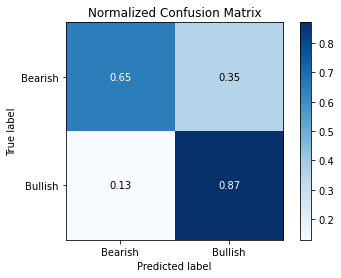

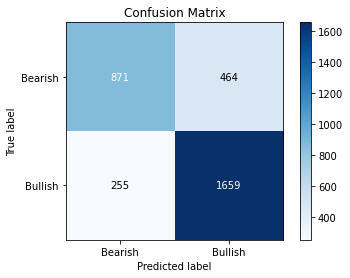

SVM
Accuracy:
0.7894736842105263

Confusion matrix:
[[ 901  434]
 [ 250 1664]]

Classification report:
              precision    recall  f1-score   support

     Bearish       0.78      0.67      0.72      1335
     Bullish       0.79      0.87      0.83      1914

    accuracy                           0.79      3249
   macro avg       0.79      0.77      0.78      3249
weighted avg       0.79      0.79      0.79      3249



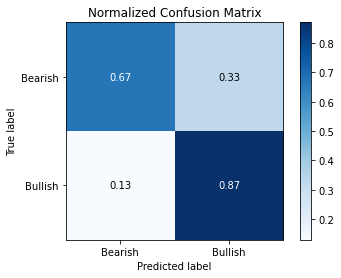

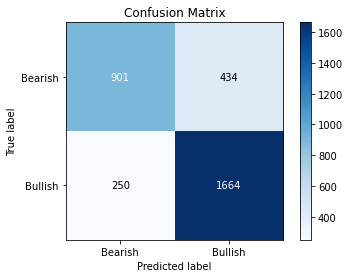

NB
Accuracy:
0.7510003077870114

Confusion matrix:
[[ 679  656]
 [ 153 1761]]

Classification report:
              precision    recall  f1-score   support

     Bearish       0.82      0.51      0.63      1335
     Bullish       0.73      0.92      0.81      1914

    accuracy                           0.75      3249
   macro avg       0.77      0.71      0.72      3249
weighted avg       0.76      0.75      0.74      3249



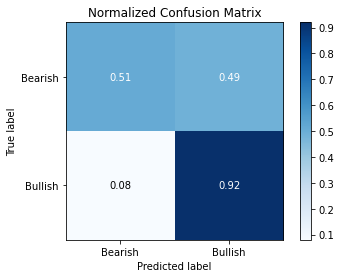

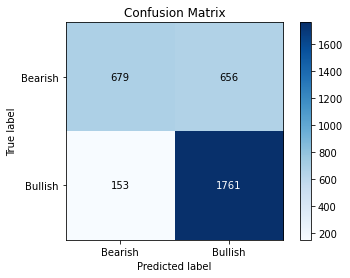

In [25]:
# Train and test data using various models

import scikitplot as skplt
for name, model in models:
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    print(name)
    print('Accuracy:')
    print(accuracy_score(y_test, predictions))
    print()
    print('Confusion matrix:')
    print(confusion_matrix(y_test,predictions))
    print()
    print('Classification report:')
    print(classification_report(y_test,predictions))
    skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
    skplt.metrics.plot_confusion_matrix(y_test, predictions)
    plt.show()

In [ ]:
# Hyperparameter tuning using GridSearch on chosen models

from sklearn.model_selection import GridSearchCV
# parameters = {'C': [0.1,1, 100], 'gamma': [1,0.01,0.001],'kernel': ['rbf', 'sigmoid']}
parameters = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
clf = GridSearchCV(SVC(), parameters, cv=10, n_jobs=-1,verbose=True)
clf.fit(X_train, y_train)

print("Best: %f using %s" % (clf.best_score_, clf.best_params_),clf.best_estimator_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 42.5min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 122.1min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 128.0min finished


Best: 0.774049 using {'C': 10, 'gamma': 1, 'kernel': 'rbf'} SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


Accuracy:
0.7879347491535857

Confusion matrix:
[[ 948  387]
 [ 302 1612]]

Classification report:
              precision    recall  f1-score   support

     Bearish       0.76      0.71      0.73      1335
     Bullish       0.81      0.84      0.82      1914

    accuracy                           0.79      3249
   macro avg       0.78      0.78      0.78      3249
weighted avg       0.79      0.79      0.79      3249



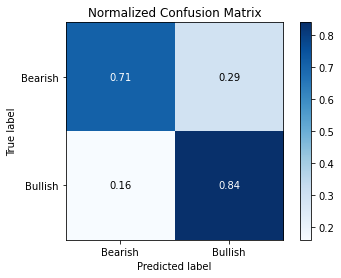

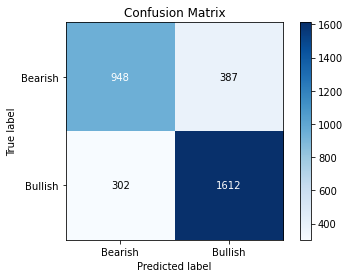

In [ ]:
# Evaluate the model with parameters chosen by GridSearch

modelSVC=SVC(C=10, gamma=1, kernel='rbf')
modelSVC.fit(X_train, y_train)

predictions=modelSVC.predict(X_test)
print('Accuracy:')
print(accuracy_score(y_test, predictions))
print()
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions))
print()
print('Classification report:')
print(classification_report(y_test,predictions))
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
skplt.metrics.plot_confusion_matrix(y_test, predictions)
#skplt.metrics.plot_confusion_matrix(Y_validation, predictions)
plt.show()

Accuracy:
0.7894736842105263

Confusion matrix:
[[ 901  434]
 [ 250 1664]]

Classification report:
              precision    recall  f1-score   support

     Bearish       0.78      0.67      0.72      1335
     Bullish       0.79      0.87      0.83      1914

    accuracy                           0.79      3249
   macro avg       0.79      0.77      0.78      3249
weighted avg       0.79      0.79      0.79      3249



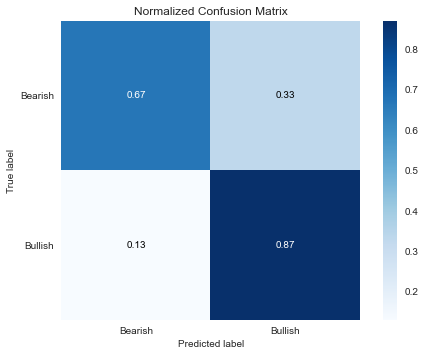

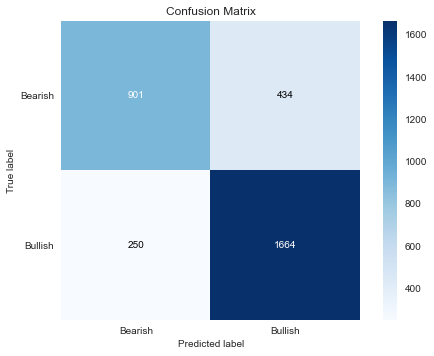

In [38]:
# We will use the default SVC since the gridsearch didn't produce a better result to observe the AUC-ROC score

import scikitplot as skplt
modelSVCFinal=SVC(probability=True)
modelSVCFinal.fit(X_train, y_train)

predictions=modelSVCFinal.predict(X_test)
print('Accuracy:')
print(accuracy_score(y_test, predictions))
print()
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions))
print()
print('Classification report:')
print(classification_report(y_test,predictions))
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
skplt.metrics.plot_confusion_matrix(y_test, predictions)
#skplt.metrics.plot_confusion_matrix(Y_validation, predictions)
plt.show()

In [45]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
svm_probs = modelSVCFinal.predict_proba(X_test)

# keep probabilities for the positive outcome only
svm_probs = svm_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
svm_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (svm_auc))

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.861


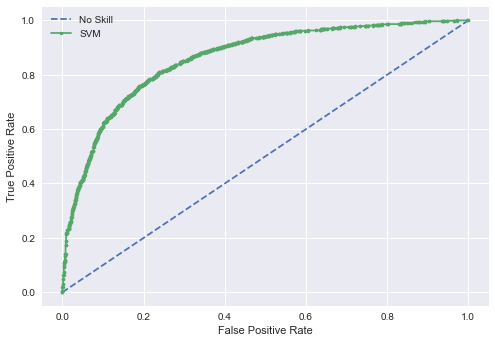

In [52]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs, pos_label='Bullish')
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs, pos_label='Bullish')
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [17]:
# Observe predictions of test data
for record, actual, predicted in zip(X_test_raw, y_test, predictions):
    print('%r = %r => %s' % (record, actual, predicted))

'fb fb 1h ssteam elliottwave nasdaqfbsuperando 192 base cierre habilita onda 5exceeding 192 base closur' = 'Bullish' => Bullish
'spx qqqdon39t fooled gov39t shutdown ending amp trade deal march coming lower highs lower lows support broken' = 'Bearish' => Bearish
'xpev xpev stock might one best options tesla investors looking join ev bandwagon tick' = 'Bullish' => Bullish
'soo many can39t keep track gotta telling something mmmm contrarian fb googl aapl' = 'Bearish' => Bearish
'msft bullish call sweep 247k alerted beta release coming soon visit sweepcastcom optionstrading daytrading stockmarket msft' = 'Bullish' => Bullish
'spx quotit39s difficult sue someone nothing wrong created biggest economic boom country39s historyquot lol' = 'Bearish' => Bearish
'trading 1350000 ouch dia' = 'Bearish' => Bearish
'30 min ago cnbc said buy travel tech stonks' = 'Bullish' => Bullish
'vix 51 lev oil 101 lev us stocks 201 lev amp gold flatline boy made money todayspy' = 'Bearish' => Bullish
'monday gree

In [24]:
# Inspect for classification errors
df1 = pd.concat( [X_test_raw, y_test], axis=1)
df2 = pd.DataFrame(predictions, columns=['Predicted'])
df3 = pd.concat([df1, df2.reset_index(drop=True)], axis=1)
print(df1)
print(df2)
print(df3)

                                          MessageCleaned Sentiment
9490   fb fb 1h ssteam elliottwave nasdaqfbsuperando ...   Bullish
10450  spx qqqdon39t fooled gov39t shutdown ending am...   Bearish
4445   xpev xpev stock might one best options tesla i...   Bullish
10267  soo many can39t keep track gotta telling somet...   Bearish
6576   msft bullish call sweep 247k alerted beta rele...   Bullish
...                                                  ...       ...
1466                              btcx bitcoin 37755 dia   Bearish
1206                                              christ   Bearish
9163   aapl tsla chinese economy therefore global eco...   Bearish
2245                          tsla tesla coming back spx   Bearish
3257                                    uvxy selllll dia   Bullish

[3249 rows x 2 columns]
     Predicted
0      Bullish
1      Bearish
2      Bullish
3      Bearish
4      Bullish
...        ...
3244   Bullish
3245   Bullish
3246   Bearish
3247   Bullish
3248  

In [ ]:
df3.to_csv('SVMtestActualVsPredicted.csv')